In [1]:
import cv2 as cv
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

from IPython.display import HTML
from IPython.display import IFrame
from IPython.display import YouTubeVideo

import group_emotion.gen.generator as ge_gen
import group_emotion.repr.representer as ge_rep

# for showing float values upto 2 decimal places
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [2]:
# Group emotion simulation

# initial value
# Happy, Not happy, Undefined
# Engaged, Not engaged, Undefined
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])

happiness_probability = np.array([[0, 0, 1]])
engagedness_probability = np.array([[0, 0, 1]])

In [3]:
for i in range(4):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.2)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    
    engagedness = ge_gen.change_transition_matrix(engagedness, change_probability=0.2)
    engagedness_probability = ge_gen.update_probability(engagedness_probability, engagedness)
    
    print(happiness_probability)
#     print(engagedness_probability)

[[0.30 0.50 0.20]]
[[0.82 0.09 0.09]]
[[0.09 0.02 0.89]]
[[0.03 0.02 0.95]]


In [4]:
## Trackbar Data
title_window = 'Skinney Pandas'

##Settings of concatenated image
max_width = 1200 # 
max_height = 900 #

## fake emotions

happy_percent = 60
sad_percent = 10
unknown_percent = 30

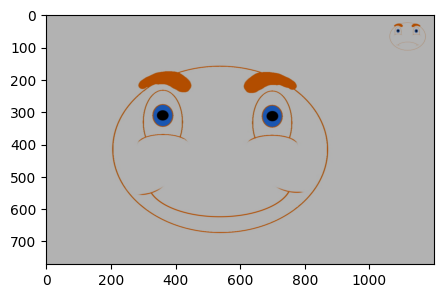

In [5]:
er = ge_rep.emotion_representer(max_width, max_height)
happyness_image = er.produce_happiness_repr(happy_percent, sad_percent, unknown_percent)

ge_rep.display_image(happyness_image, figsize=(5, 4))
# cv.imshow('happyness_image', happyness_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [6]:
er = ge_rep.emotion_representer(max_width, max_height)

img = [] # some array of images
frames = [] # for storing the generated images

fig = plt.figure(figsize=(10, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.title('happiness')

for i in range(20):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.2)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
#     engagedness = ge_gen.change_transition_matrix(engagedness, change_probability=0.2)
#     engagedness_probability = ge_gen.update_probability(engagedness_probability, engagedness)
    
    happy_percent = happiness_probability[0, 0]
    sad_percent = happiness_probability[0, 1]
    unknown_percent = happiness_probability[0, 2]
    
    happiness_image = er.produce_happiness_repr(happy_percent, sad_percent, unknown_percent)
    
    happiness_image = happiness_image.astype('float32') * 255    
#     frames.append([plt.imshow(happiness_image, cmap=cm.Greys_r, animated=True)])
    frames.append([plt.imshow(cv.cvtColor(happiness_image, cv.COLOR_BGRA2RGB).astype('uint8'), cmap=cm.Greys_r, animated=True)])
    
    
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
plt.close()
ani.save('movie.mp4')

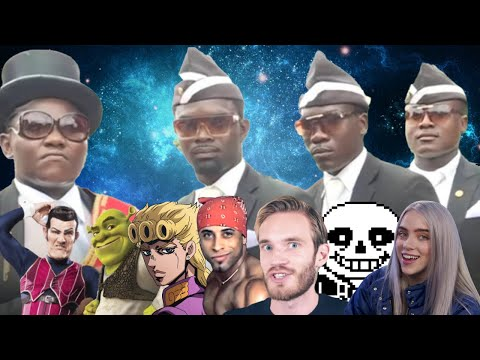

In [16]:
YouTubeVideo('fVdL3P_8MQM', width=600, height=500, autoplay=1, controls=1, loop=1, start=0)

In [8]:
HTML(ani.to_html5_video())